# The Sinkhorn Algorithm - Optimal Transport HomeWork

Submitted to: Mr. Luca NENNA 

Done by: Iyad WALWIL

## Description

The aim of this homework is to solve the following problem (*relaxation of Kantorovich problem*) by mean of the Sinkhorn algorithm

$$\mathbf{P}_{\epsilon} = \{\langle \gamma | c \rangle + \epsilon Ent(\gamma) ~|~ \gamma \in \mathbb{R}^{X \times Y}, \sum_{y \in Y} \gamma_{xy} = \mu_x, \sum_{x \in X} \gamma_{xy} = \nu_y\}$$
Where,
* $\epsilon > 0$
* $X ~ \& ~ Y$ are two finite sets with $|X| = |Y| = N \in \mathbb{N}$
* $\langle \gamma | c \rangle = \sum_{x,y} \gamma_{xy}~ c(x,y)$
* $Ent(\gamma) = \sum_{x,y}e(\gamma_{xy})~~~~~~~~~~~~~ \text{with}~~ e(r) =  \begin{cases} r(\log r - 1) & \text{If}~ r > 0 \\ 0 & \text{If}~ r = 0 \\ + \infty & \text{Otherwise}\end{cases}$

### Optimal Solution Form 

As we have seen, the optimal solution to $\mathbf{P}_{\epsilon}$ takes the following form
$$\gamma_{x,y} = diag(D_{\phi}) \exp(\frac{-c(x,y)}{\epsilon})diag(D_{\psi})$$

where $diag(D_{\phi})$ and $diag(D_{\psi})$ are two diagonal matrices having the diagonal $D_{\phi}$ and $D_{\mathbb{\psi}}$, respectively.

#### Importing the needed libraries 

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats
import scipy
import math 

#### Cardinality of $X ~ \& ~ Y$

In [3]:
N = int(input("Enter the Cardinality: "))

Enter the Cardinality: 300


### Question 01

Write a function **sinkhorn(mu,nu,Keps,kmax)** that takes as input two vectors $\mu$ and $\nu$, the kernel Keps defined as $K_{x,y} = \exp \frac{-(x - y)^2}{\epsilon}$ and the maximum number of iterations **kmax**. 

The function will return two vectors $D_{\phi}$ and $D_{\psi}$ and a matrix $\gamma$.

In [4]:
def kernel_Keps(epsilon, X, Y):

    K = np.zeros((N,N))
    
    for i in range(N):
        for j in range(N):
            K[i][j] = np.exp(-(X[i] - Y[j])**2/epsilon)
    
    return K

In [5]:
def sinkhorn_Knopp(mu, nu, Keps, kmax):
    
    Dphi = np.ones(N)             # Initialize Dphi as a vector of ones
    Dpsi = np.ones(N)             # Initialize Dpsi  as a vector of ones
    
    for k in range(kmax):
        U = np.dot(Keps, Dpsi)                    # U = K*Dpsi   (The denominator of Dphi)
        Dphi = mu/U                               # Updating Dphi
        V = np.dot(np.transpose(Keps), Dphi)      # V = transpose(K)*Dphi   (The denominator of Dpsi)
        Dpsi = nu/V                               # Updating Dpsi
    
    DDphi = np.diag(Dphi)                         # Diagonal Matrix has the diagonal DPhi
    DDpsi = np.diag(Dpsi)                         # Diagonal Matrix has the diagonal DPsi
    
    
    gamma = DDphi.dot(Keps).dot(DDpsi)            # Computing the OPTIMAL gamma 
    
    return (Dphi, Dpsi, gamma) 

### Question 02

Let $X$ and $Y$ two sets of $N$ random points in $[0, 1]$ and consider two measures such that $\mu_x = \frac{1}
{N} ~~ \forall x \in X$ and $\nu_y = \frac{1}{N} ~~ \forall y \in Y$

* Compute the optimal solution to $\mathbf{P}_{\epsilon}$ for different values of $\epsilon$
* plot it and comment the results
* What do you expect as $\epsilon \rightarrow 0$?

##### Random Sets

In [80]:
X = np.random.rand(N)    # |X| = N points in [0, 1] 
Y = np.random.rand(N)    # |Y| = N points in [0, 1]

In [81]:
X = np.sort(X)
Y = np.sort(Y)

##### Uniform measures

In [82]:
mu = np.ones(N)/N
nu = np.ones(N)/N

##### Epsilon's Values


In [51]:
Epsilons = [35, 20, 8, 4, 1, 1e-2]

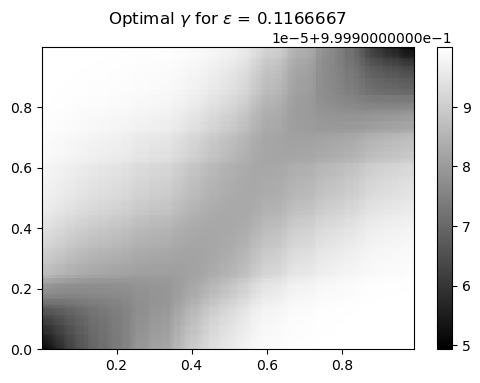

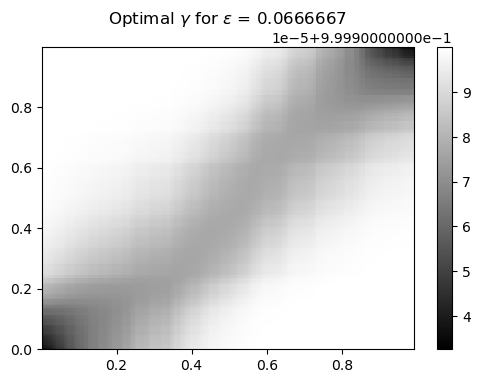

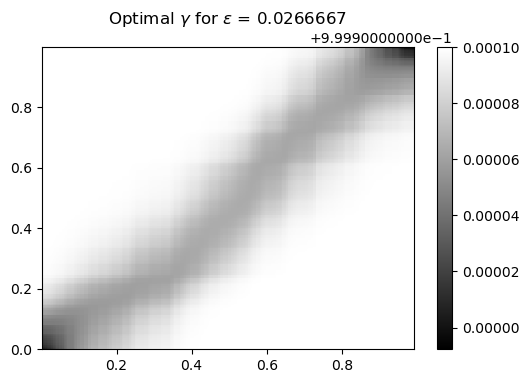

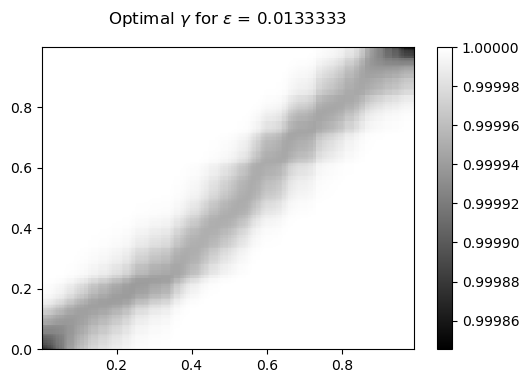

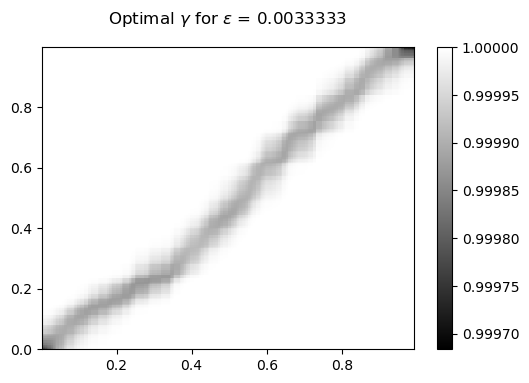

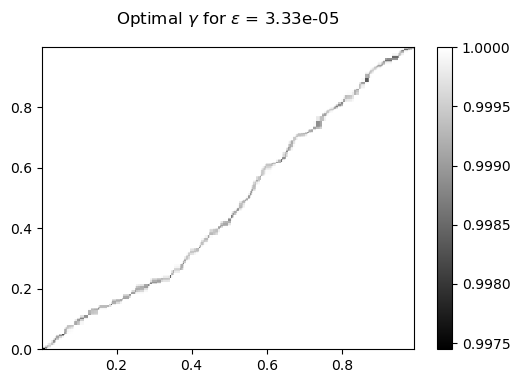

In [83]:
# Computing the optimal solution to P for different values of epsilon
for e in Epsilons:
    Keps = kernel_Keps(e/N, X, Y)                   # Computing the Kernel Keps for each epsilon
    S = sinkhorn_Knopp(mu, nu, Keps, 4000)    # Computing the Optimal gamma by the Sinkhorn Algorithm with 4000 iterations
    
    # Plotting gamma for each epsilon
    plt.close()
    plt.figure(dpi = 100)
    plt.pcolormesh(X, Y, 1 - S[2], cmap = 'gray', shading='auto' )    
    plt.title('Optimal $\gamma$ for $\epsilon$ = {}'.format(round(e/N, 7)), y=1.05)
    plt.colorbar()
    plt.show()

### Comments 

1. We can observe that as $\epsilon$ gets smaller and smaller, the optimal transport plan $\gamma$ gets better and better in the sense of its support which coincides with what we have seen during the course. That's because as $\epsilon$ gets larger, this will allow $x \in X$ to bind to a larger number of $y \in Y$. Hence, the measure is going to be distributed on a larger set which implies a bigger support.


2. As $\epsilon \rightarrow 0$, we will get almost the optimal transport plan $\gamma$ of the unregularized Kantorovich problem. the best $\gamma$ as well as the best-support

### Question 03

Modify the function sinkhorn(mu,nu,Keps,kmax) such that it also returns a vector **err1** containing
the constraints satisfaction at each step of the algorithm, that is $err_1^k = \|\gamma_1^k - \mu\|_1$ where $(\gamma_1^k)_x = \sum_{y}\gamma^k_{x,y}$

Display err1 in log-scale by taking the same data as in question 2 and study the impact of $\epsilon$ on the convergence rate of the algorithm.

##### Editing the above algorithm by adding the Error term

In [84]:
def sinkhorn_Knopp_err(mu, nu, Keps, kmax):
    
    Dphi = np.ones(N)
    Dpsi = np.ones(N)
    
    Err = []                        # List of the error at each iteration that we are going to plot it
    
    for k in range(kmax):
        U = np.dot(Keps, Dpsi)
        Dphi = mu/U
        V = np.dot(np.transpose(Keps), Dphi)
        Dpsi = nu/V
        
        DDphi = np.diag(Dphi)
        DDpsi = np.diag(Dpsi)
        gamma = DDphi.dot(Keps).dot(DDpsi)  # Computing gamma inside the loop so we can update the error at each iteration
        
        Err.append(np.sum(abs(gamma.sum(axis = 1) - mu)))     # Adding the error of each iteration to the list

    
    return Err 

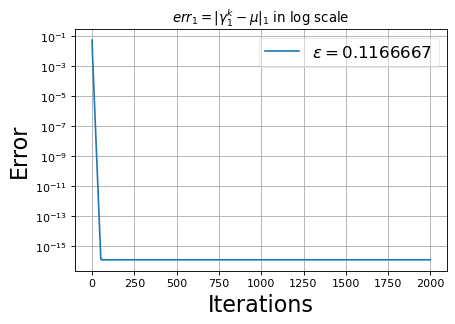

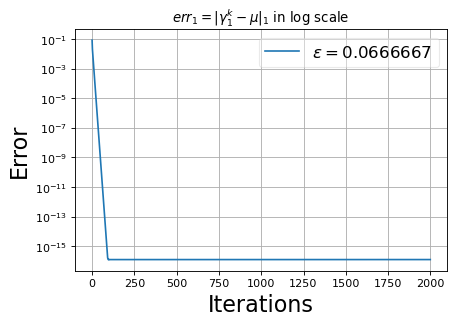

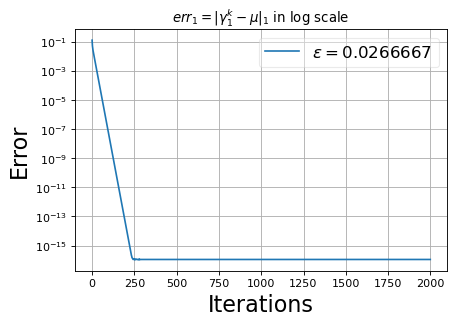

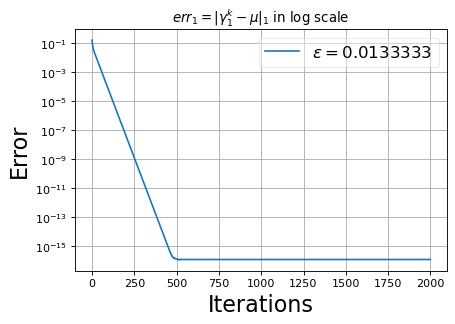

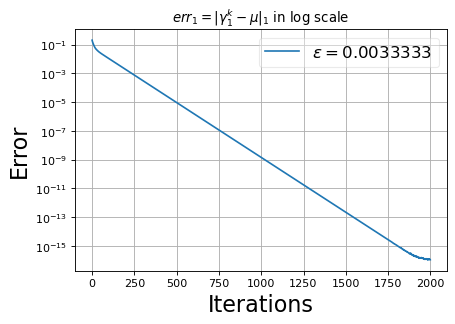

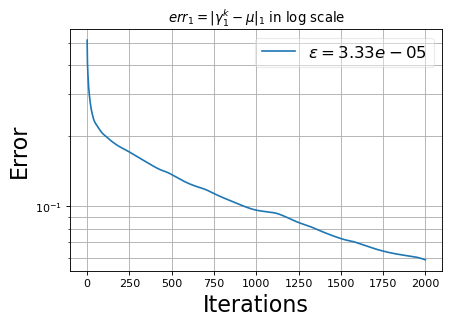

In [98]:
for e in Epsilons:
    Keps = kernel_Keps(e/N, X, Y)
    SE = sinkhorn_Knopp_err(mu, nu, Keps, 2000)
    
    plt.close()
    plt.figure(dpi = 80)
    plt.semilogy(SE, label = '$\epsilon = {}$'.format(round(e/N, 7))) 
    plt.grid(which = 'both')
    plt.title('$err_1 = \|\gamma_1^k - \mu\|_1$ in log scale')
    plt.legend(loc='upper right', fancybox=True, prop={'size':15}).get_frame().set_alpha(0.4)
    plt.ylabel("Error", fontsize=20)
    plt.xlabel("Iterations", fontsize=20)
    plt.show()

Text(0.5, 0, 'Iterations')

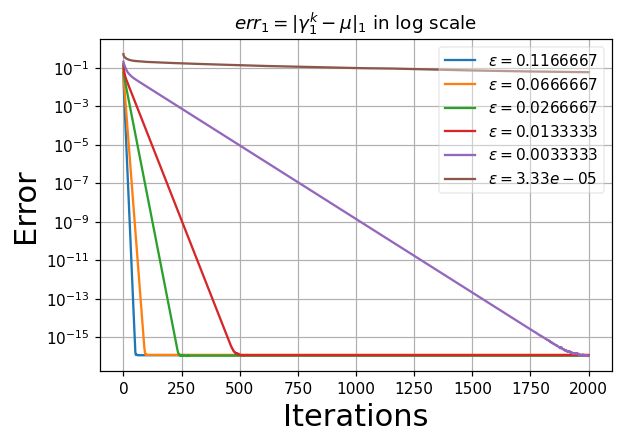

In [103]:
plt.figure(dpi = 110)
plt.grid(which = 'both')
for e in Epsilons:
    Keps = kernel_Keps(e/N, X, Y)
    SE = sinkhorn_Knopp_err(mu, nu, Keps, 2000)
    plt.semilogy(SE, label = '$\epsilon = {}$'.format(round(e/N, 7))) 
    plt.legend(loc='upper right', fancybox=True, prop={'size':10}).get_frame().set_alpha(0.4)
plt.title('$err_1 = \|\gamma_1^k - \mu\|_1$ in log scale')
plt.ylabel("Error", fontsize=20)
plt.xlabel("Iterations", fontsize=20)

### Comments 

1. It's notable that there is an inverse relationship between the error ($err_1^k$) and the value of $\epsilon$ which is logical. As our $\epsilon$ is smaller, the support will be smaller as in question 02, and we'll need a larger number of iterations to have a good $\gamma$ with marginal $\mu$.


2. It's great that we got ***Linear Convergence***, and I'd say it's even for any value of $\epsilon$. However, for bigger $\epsilon$ will be quite faster than smaller and smaller values of $\epsilon$.


3. I'd explain a reason for this difference referring to what we've taken at the begging of the $2^{nd}$ lecture actually, as we have seen for the unregularized problem, it has a running time of $\mathcal{O}(N^3)$ which we will "approximately" get for a quite small value of $\epsilon$. Thus, for $N = 300$, I insist that with $N^3$ iterations, the error will linearly converges, even for really small values of $\epsilon < 3.33*10^{-5}$

### Question 04

Modify the function by using $err^k_1 > tol$ as a stopping criterion. 

The new function will take as
input also a tolerance parameter $tol \Rightarrow$ sinkhorn(mu,nu,Keps,kmax,tol).

In [104]:
def sinkhorn_Knopp_tol(mu, nu, Keps, kmax, tol):
    
    Err = []
    ite = 0                    # Counting the number of iteration, in order to return it back 
    Dphi = np.ones(N)
    Dpsi = np.ones(N)
    
    DDphi = np.diag(Dphi)
    DDpsi = np.diag(Dpsi)
    gamma = DDphi.dot(Keps).dot(DDpsi)                 # computing thhe first value of gamma to initialize the error
    
    err = np.sum(abs(gamma.sum(axis = 1) - mu))        # Initializing the error 
    Err.append(err)
    
    
    while((ite < kmax) & (err > tol)):         # Updating the STOPPING CRITERION to depend on the tol. 
                                            # However, I kept the Kmax criterion in case the tol. is pretty hard to reach
        ite += 1                     # Updating the number of iterations 
        U = np.dot(Keps, Dpsi)
        Dphi = mu/U
        V = np.dot(np.transpose(Keps), Dphi)
        Dpsi = nu/V
        
        DDphi = np.diag(Dphi)
        DDpsi = np.diag(Dpsi)
        gamma = DDphi.dot(Keps).dot(DDpsi)
        err = np.sum(abs(gamma.sum(axis = 1) - mu))
        
        Err.append(err)

    
    return Err, gamma, ite

### Question 05

Let $\mu$ and $\nu$ be the **discretization of truncated Gaussian distributions** of (mean,variance) $(0.2, 0.1^2)$
and (0.6, 0.2^2) and compute the solution to $\mathbf{P}_{\epsilon}$ by choosing the smallest $\epsilon$ possible. Display the support of the optimal transport plan.

##### Defining the Discretized Truncated Gaussian Distribution

1. Discretization: I've considered the interval $[0, 1]$ and discretized it into $N$ points, namely it's the set $L$ in the cell of code below ($|L| = N$)
2. Function Values: for each $x \in L$, I computed it's truncated density function value $E(x)$ and put it in the list $E$ $$E(x) = \exp{\frac{-(x - m)^2}{2\sigma^2}}$$
3. Normalization: I've divided the set $E$ by it's summation ($\sum_{i = 1}^{N}  \exp{\frac{-(x_i - m)^2}{2\sigma^2}}$)

Where, 
* $m$ is the mean 
* $\sigma$ is the standard deviation 

In [105]:
def discrete_trun_distr(a, b, m, sigma, n = N):
    
    """  
    param a: is the left endpoint of the interval [a, b]
    param b: is the right endpoint of the interval [a, b] 
    param m: is the mean.
    param sigma: is the standard deviation.
    param n: is the number of points we are going to discretize [a, b] into it.
    
    """
    L = np.linspace(a, b, n)      # Discretize the interval [a, b] into n points 
    E = []
    
    for l in L:
        e = np.exp(-((l - m)**2/(2*sigma**2)))    # Computing the Density Function Values 
        E.append(e)
    
    S = np.sum(E)         # Normalization
    E = E/S
    
    return E, L

##### Defining the Truncated $\mu ~ \& ~ \nu$ 

In [109]:
mu_truncated = discrete_trun_distr(0,1,0.2,0.1)

In [110]:
nu_truncated = discrete_trun_distr(0,1,0.6,0.2)

In [111]:
mu_trun = mu_truncated[0]
nu_trun = nu_truncated[0]

In [112]:
X_trun = mu_truncated[1]
Y_trun = nu_truncated[1]

##### The solution to $\mathbf{P}_{\epsilon}$ by choosing the smallest $\epsilon$ possible 

I've tried several values of $\epsilon$. However, up to 5 digits, the smallest possible $\epsilon = 0.00068$

If we want to have something smaller, we shall choose some $0.00067 < \epsilon < 0.00068$, thus it becomes 6 digits 

I've displayed the support of the optimal transport plan $\gamma$ for $\epsilon \in [0.01, 0.005, 0.0009, 0.0007, 0.00068]$.

In [145]:
Epsilons_Truncated = [0.01, 0.005, 0.0009, 0.0007, 0.00068]

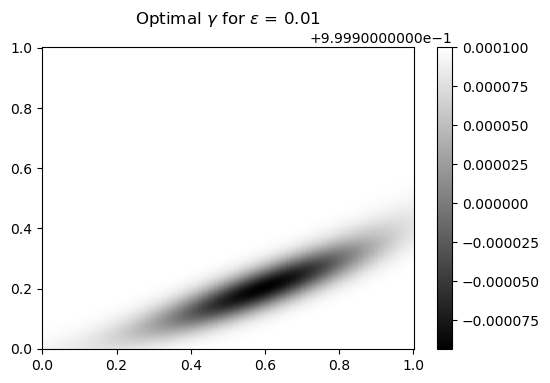

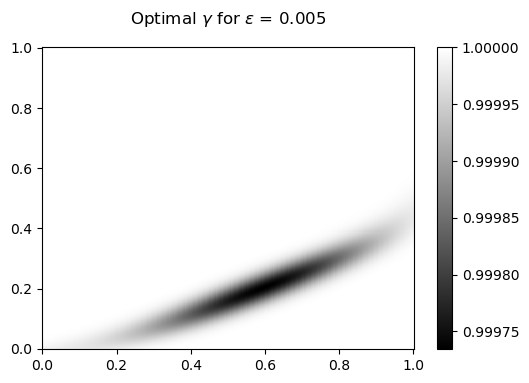

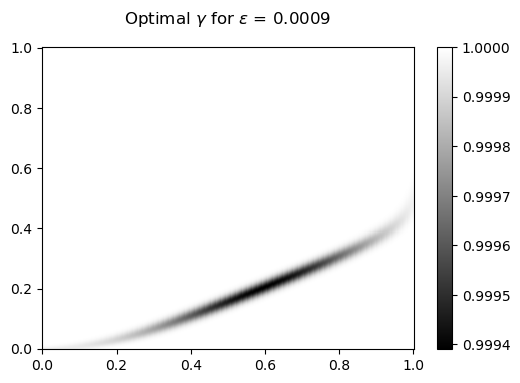

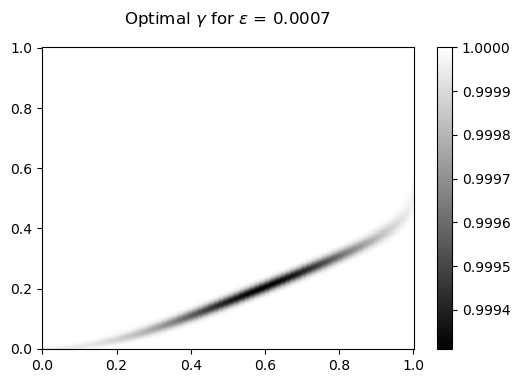

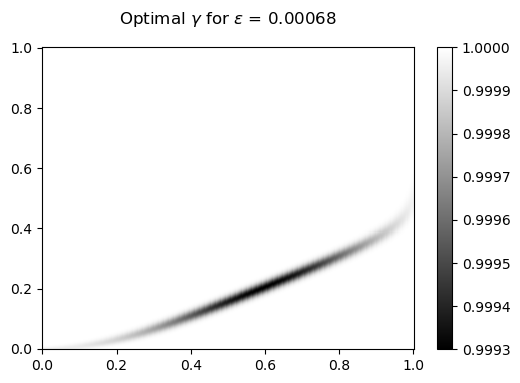

In [147]:
for e in Epsilons_Truncated:
    Keps = kernel_Keps(e, X_trun, Y_trun)                   # Computing the Kernel Keps for each epsilon
    ST = sinkhorn_Knopp_tol(mu_trun, nu_trun, Keps, 10000, 1e-14)
    
    # Plotting gamma for each epsilon
    plt.close()
    plt.figure(dpi = 100)
    plt.pcolormesh(X_trun, Y_trun, 1 - ST[1], cmap = 'gray', shading='auto' )    
    plt.title('Optimal $\gamma$ for $\epsilon$ = {}'.format(e), y=1.05)
    plt.colorbar()
    plt.show()

### Question 06

Because of the discretization and the regularization, we see that the optimal transport plan is not deterministic. A workaround is to define the barycentric projection map
$$T(x) = \frac{\sum_{y \in Y} y\gamma_{xy}}{\sum_{y \in Y} \gamma_{xy}}$$

Which is well-defined whenever $a_x = \sum_{y \in Y} P_{x,y} > 0$. Use the barycentric projection to compute
an approximation of the transport plan between the two measure.

In [150]:
def barycentric_Projection(X, Y, gamma):
    
    T = np.ones(len(X))
    S = 0
    SS = 0
    for x in range(len(X)):
        S = Y*gamma[x]            # product of y and some row x of gamma
        S = sum(S)                # The numerator, sum of the previous product
        SS = sum(gamma[x])        # The denominator, sum of gamma w.r.t. y 
        t = S/SS                  # Value of T for some x 
        T[x] = t

    return T

In [152]:
Tx = barycentric_Projection(X_trun, Y_trun, ST[1])

Text(0.5, 0, '$T(X)$')

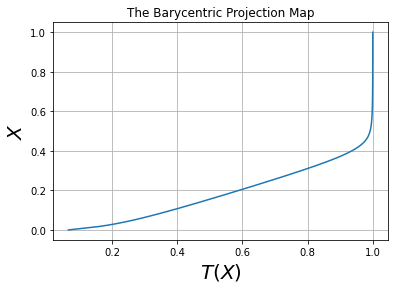

In [157]:
plt.close()
plt.plot(Tx, X_trun)
plt.grid(which = 'both')
plt.title('The Barycentric Projection Map')
plt.ylabel("$X$", fontsize=20)
plt.xlabel("$T(X)$", fontsize=20)

### Comments

We can observe that the barycentric projection map $T(x)$ perfectly satisfies the support of $\gamma$ 